In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import contractions as ct

In [24]:
df = pd.read_csv('../data/combined_dataset/goemotions_combined.csv')

In [25]:
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df.shape

(211225, 37)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  

In [28]:
available_emotions = [col for col in df.columns if col in SELECTED_CLASSES + ['neutral']]
df = df[['id', 'text'] + available_emotions]

In [29]:
def clean_text(text):
    text = str(text).lower()
    text = ct.fix(text)
    return ' '.join(text.split())

In [30]:
emotion_columns = df.columns[9:]
grouped_df = df.groupby(['id', 'text'])[emotion_columns].sum().reset_index()

for col in emotion_columns:
    grouped_df[col] = (grouped_df[col] > 0).astype(int)

master_df = grouped_df.drop(columns=['id'])
master_df['text'] = master_df['text'].apply(clean_text)

master_emotions_df = master_df[master_df['neutral']==0].copy()
master_emotions_df = master_emotions_df.drop(columns=['neutral'])

In [31]:
master_emotions_df.head()

,text,gratitude,joy,optimism,sadness,surprise
0,fast as [name] will carry me. seriously uptown...,0,0,0,0,0
2,tl;dr no more superbowls for [name]. get ready...,0,0,0,0,0
3,so much time saved. not.,0,1,0,0,0
6,thanks for the advice man ! have a great new y...,1,0,0,0,0
8,glad to hear it. you deserve your best life wi...,0,1,0,0,0


In [32]:
master_emotions_df.shape

(26488, 6)

In [33]:
SELECTED_CLASSES = [
    "admiration", "approval", "gratitude", "joy", "amusement", "optimism",
    "anger", "annoyance", "sadness", "confusion", "surprise", "disgust"
]

In [34]:
available_emotions = [col for col in df.columns if col in SELECTED_CLASSES + ['neutral']]
df = df[['id', 'text'] + available_emotions]

In [35]:
emotion_columns = [col for col in df.columns if col not in ['id', 'text']]
grouped_df = df.groupby(['id', 'text'])[emotion_columns].sum().reset_index()

In [36]:
def clean_text(text):
    text = str(text).lower()
    text = ct.fix(text)
    return ' '.join(text.split())

In [37]:
for col in emotion_columns:
    grouped_df[col] = (grouped_df[col] > 0).astype(int)

# Drop neutral if you want only selected emotions
master_df = grouped_df.drop(columns=['id'])
master_df['text'] = master_df['text'].apply(clean_text)
master_emotions_df = master_df[master_df['neutral'] == 0].copy()
master_emotions_df = master_emotions_df.drop(columns=['neutral'])

In [38]:
master_emotions_df = master_emotions_df[['text'] + SELECTED_CLASSES]


In [39]:
master_emotions_df.shape

(26488, 13)

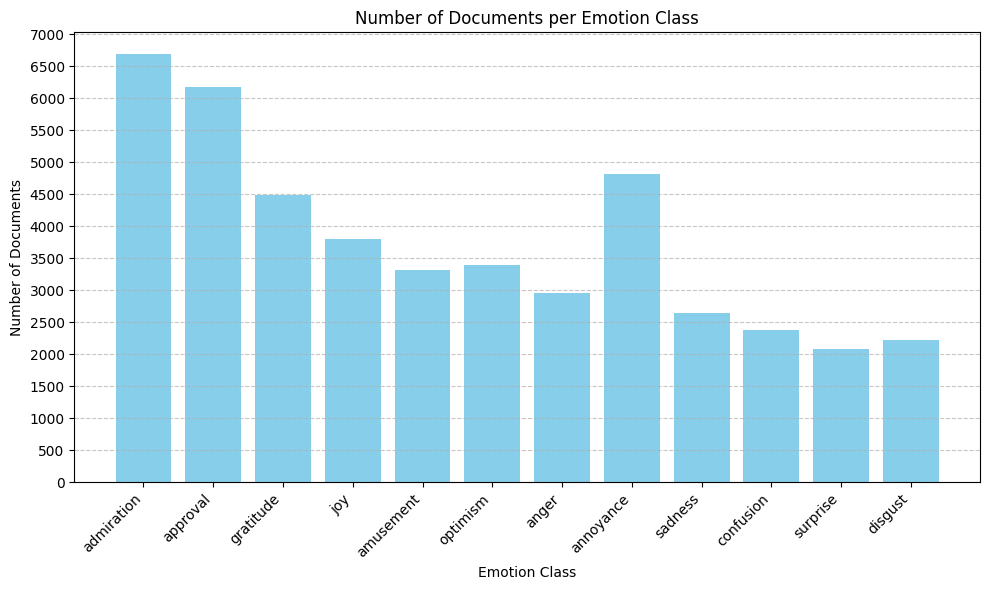

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Count number of documents per class
class_counts = master_emotions_df[SELECTED_CLASSES].sum()

# Plot
plt.figure(figsize=(10,6))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, class_counts.max() + 500, 500))  # Adjust step as needed
plt.xlabel("Emotion Class")
plt.ylabel("Number of Documents")
plt.title("Number of Documents per Emotion Class")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [42]:
X = master_emotions_df['text']
y = master_emotions_df.iloc[:, 1:].values

# Train / val / test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

(X_train, y_train), (X_val, y_val), (X_test, y_test)

((26914                        his friend was sexy as hell 💁
  46828                                    wonderfully said!
  53798    am i the only one who finds this hilarious? go...
  26504    damn girl, stockholm syndrome is strong with y...
  18692    oops, accidentally fed the troll. ah well, we ...
                                 ...                        
  47259    not ok. they could have easily given them a dr...
  11710    this just is not true. it was before [name] pr...
  1781                               this article is stupid.
  34475    no deal violates the national security interes...
  51764    this is the most adorable thing i have been ma...
  Name: text, Length: 18541, dtype: object,
  array([[1, 1, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0]], shape=(18541, 12))),
 (39358            a surprise to be sure, but